# Parcial 2: Instrumentación Nuclear
### Juan Sebastian Sierra Jaraba

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import scipy.optimize as opt

In [2]:
from cycler import cycler
# Set a global color cycle
plt.rcParams['axes.prop_cycle'] = cycler(color=[
    "#3A88C9",  # Azul intermedio más intenso
    "#5A33C9",  # Azul violáceo intenso
    "#6825A5",  # Violeta frío fuerte
    "#75189D"   # Púrpura frío vibrante con alto contraste
])

In [3]:
def line_gaussian(x, amplitude, mean, sigma, a0, a1):
    return (amplitude * np.exp(-((x - mean) ** 2) / (2 * sigma ** 2)) 
            + a0 + a1*(x-mean))

def line(x, a0, a1):
    return a0 + a1*x

def line_double_gaussian(x, amplitude_1, mean_1, sigma_1,
                        amplitude_2, mean_2, sigma_2, a0, a1):
    return (amplitude_1 * np.exp(-((x - mean_1) ** 2) / (2 * sigma_1 ** 2))
            + amplitude_2 * np.exp(-((x - mean_2) ** 2) / (2 * sigma_2 ** 2)) 
            + a0 + a1*(x-mean_1))

def fit_curve(x_data, y_data, function, initial_guess):
    params, covs = opt.curve_fit(function, x_data, y_data, p0=initial_guess)
    return params, covs  # Returns [amplitude, mean, sigma]

def graph(canales, cuentas, function, params):
    canales_plot = np.linspace(np.min(canales), np.max(canales))
    plt.plot(canales, cuentas, linewidth = 2, label = 'datos', ds ='steps-post')
    plt.plot(canales_plot, function(canales_plot, *params),
            label = 'ajuste', linestyle = '--', color = 'k')
    plt.tick_params(axis  = 'both', which = 'both', direction = 'out', length = 4, width = 1)
    plt.xlabel('Canales')
    plt.ylabel('Cuentas')
    plt.legend()
    plt.show()

In [4]:
Na22 = pd.read_csv('22Na-previa2.csv')
Cs137 = pd.read_csv('137Cs-previa2.dat', delim_whitespace=True)
fondo = pd.read_csv('fondo-previa2.dat', delim_whitespace=True)

/tmp/ipykernel_43486/2173648447.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  Cs137 = pd.read_csv('137Cs-previa2.dat', delim_whitespace=True)
/tmp/ipykernel_43486/2173648447.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fondo = pd.read_csv('fondo-previa2.dat', delim_whitespace=True)


## 22Na

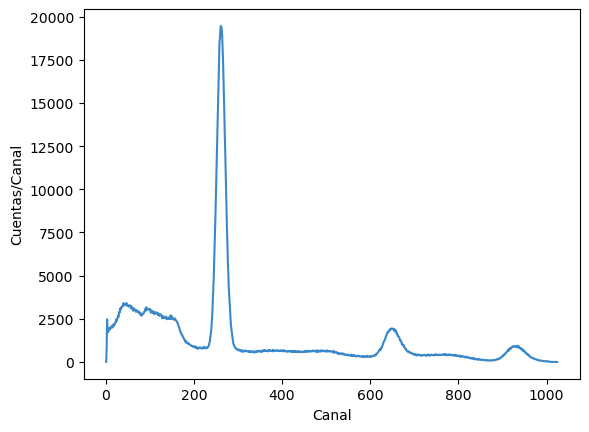

In [5]:
canales_22Na, cuentas_22Na = np.array(Na22['canal']), np.array(Na22['cuentas'])

plt.plot(canales_22Na, cuentas_22Na)
plt.xlabel('Canal')
plt.ylabel('Cuentas/Canal')
plt.savefig('22NaSemilog.png', dpi=300)

### pico 511keV

In [6]:
canales = np.array(canales_22Na[220: 310])
cuentas = np.array(cuentas_22Na[220: 310])

initial_guess = [max(cuentas), np.mean(canales), np.std(canales), min(cuentas), 0 ]
params22Na_1, cov_22Na_1 = fit_curve(canales, cuentas, line_gaussian, initial_guess)

canales_ = np.linspace(220, 310)

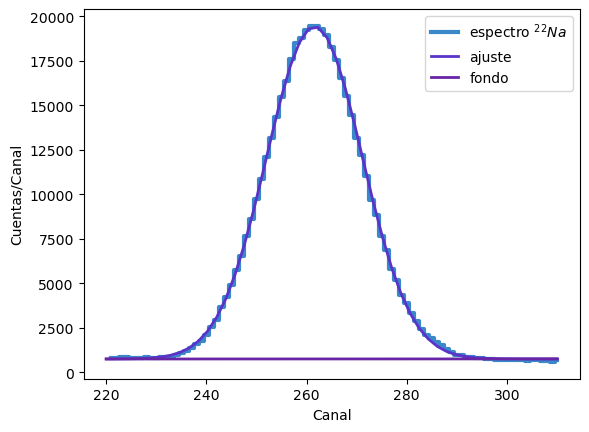

In [7]:
plt.plot(canales, cuentas, label=r'espectro $^{22}Na$', ds ='steps-mid', linewidth=3)
plt.plot(canales_, line_gaussian(canales_, *params22Na_1), linewidth=2, label = 'ajuste')
plt.plot(canales_, line(canales_-260, *params22Na_1[-2:]), label='fondo',  linewidth=2)
plt.legend()
plt.xlabel('Canal')
plt.ylabel('Cuentas/Canal')
plt.savefig('22Napico1.png', dpi=300)

In [8]:
params22Na_1, np.diag(cov_22Na_1)

(array([1.86856192e+04, 2.61571880e+02, 9.57514315e+00, 7.52037760e+02,
        5.38651184e-02]),
 array([1.33149951e+03, 4.51805083e-04, 5.89983917e-04, 3.54236682e+02,
        2.47720045e-01]))

In [9]:
np.sqrt(2*np.pi)*params22Na_1[0]*params22Na_1[2], np.sqrt(2*np.pi)*np.sqrt(np.diag(cov_22Na_1))[0]*params22Na_1[2]

(448479.611838955, 875.8015613728764)

In [10]:
canales = canales_22Na[580: 720]
cuentas = cuentas_22Na[580: 720]

print(type(canales))

initial_guess = [max(cuentas), np.mean(canales), np.std(canales), 
                            min(cuentas), (cuentas[-1] - cuentas[0])/(canales[-1] - canales[0]) ]
params22Na_2, cov_22Na_2 = fit_curve(canales, cuentas, line_gaussian, initial_guess)

canales_ = np.linspace(580, 720)

<class 'numpy.ndarray'>


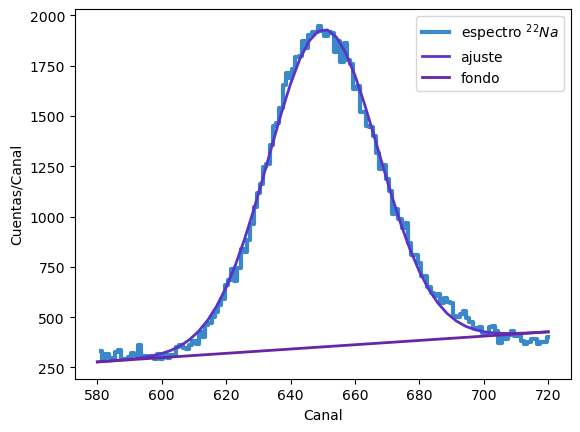

In [11]:
plt.plot(canales, cuentas, label=r'espectro $^{22}Na$', ds ='steps-mid', linewidth=3)
plt.plot(canales_, line_gaussian(canales_, *params22Na_2), linewidth=2, label = 'ajuste')
plt.plot(canales_, line(canales_-650, *params22Na_2[-2:]), label='fondo',  linewidth=2)
plt.legend()
plt.xlabel('Canal')
plt.ylabel('Cuentas/Canal')
plt.savefig('22Napico2.png', dpi=300)

In [12]:
params22Na_2

array([1.57867342e+03, 6.50216080e+02, 1.70486158e+01, 3.52145466e+02,
       1.06834278e+00])

In [13]:
np.sqrt(2*np.pi)*params22Na_2[0]*params22Na_2[2], np.sqrt(2*np.pi)*np.sqrt(np.diag(cov_22Na_2))[0]*params22Na_2[2]

(67463.88607471742, 398.32208495364165)

In [14]:
canales = canales_22Na[870: 990]
cuentas = cuentas_22Na[870: 990]

initial_guess = [max(cuentas), np.mean(canales), np.std(canales), min(cuentas), 0 ]
params22Na_3, cov_22Na_3 = fit_curve(canales, cuentas, line_gaussian, initial_guess)

canales_ = np.linspace(870, 990)

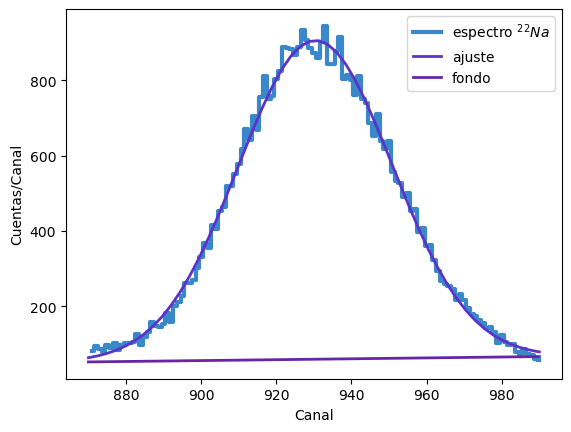

In [15]:
plt.plot(canales, cuentas, label=r'espectro $^{22}Na$', ds ='steps-mid', linewidth=3)
plt.plot(canales_, line_gaussian(canales_, *params22Na_3), linewidth=2, label = 'ajuste')
plt.plot(canales_, line(canales_-930, *params22Na_3[-2:]), label='fondo',  linewidth=2)
plt.legend()
plt.xlabel('Canal')
plt.ylabel('Cuentas/Canal')
plt.savefig('22Napico3.png', dpi=300)

In [16]:
params22Na_3

array([8.47079529e+02, 9.30336672e+02, 2.05177779e+01, 5.94442444e+01,
       1.18714797e-01])

In [17]:
np.sqrt(2*np.pi)*params22Na_3[0]*params22Na_3[2], np.sqrt(2*np.pi)*np.sqrt(np.diag(cov_22Na_3))[0]*params22Na_3[2]

(43565.674719093375, 324.3657794858273)

In [18]:
energias, canales = [511, 1274.5, 1785.5], [262, 650, 930]

In [19]:
params_cal, cov_cal = fit_curve(canales, energias, line, (0,0))

In [20]:
params_cal, np.sqrt(np.diag(cov_cal))

(array([16.58106381,  1.91164865]), array([26.75424629,  0.03979389]))

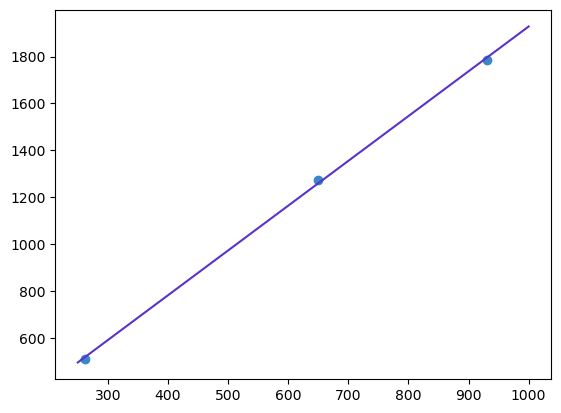

In [22]:
canal = np.linspace(250, 1000)
plt.plot(canales, energias, 'o')
plt.plot(canal, line(canal, *params_cal))

In [23]:
canales = np.array(canales_22Na[0: 310])
cuentas = np.array(cuentas_22Na[0: 310])

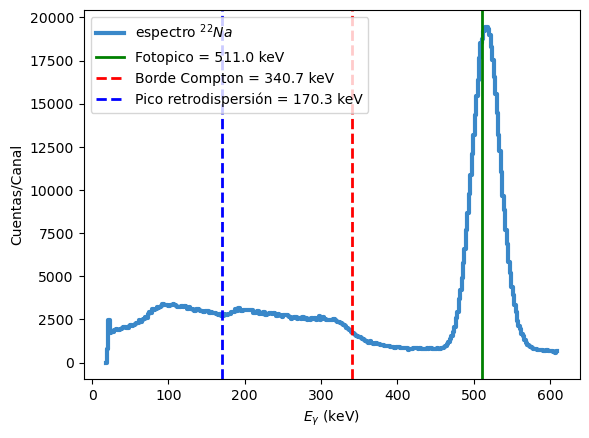

In [37]:
plt.plot(line(canales, *params_cal), cuentas, label=r'espectro $^{22}Na$', ds ='steps-mid', linewidth=3)

E_gamma = 511  # keV

# Energía de reposo del electrón
m_e_c2 = 511  # keV

# Cálculo del borde Compton:
E_compton_edge = E_gamma * (1 - 1 / (1 + (2 * E_gamma / m_e_c2)))

# Cálculo del pico de retrodispersión:
E_backscatter = E_gamma / (1 + (2 * E_gamma / m_e_c2))

# Dibujar líneas verticales para cada energía
plt.axvline(E_gamma, color='green', linestyle='-', linewidth=2,
           label=f'Fotopico = {E_gamma:.1f} keV')
plt.axvline(E_compton_edge, color='red', linestyle='--', linewidth=2,
           label=f'Borde Compton = {E_compton_edge:.1f} keV')
plt.axvline(E_backscatter, color='blue', linestyle='--', linewidth=2,
           label=f'Pico retrodispersión = {E_backscatter:.1f} keV')

plt.legend()
plt.xlabel(r'$E_\gamma$ (keV)')
plt.ylabel('Cuentas/Canal')
plt.savefig('22Naretropico1.png', dpi=300)

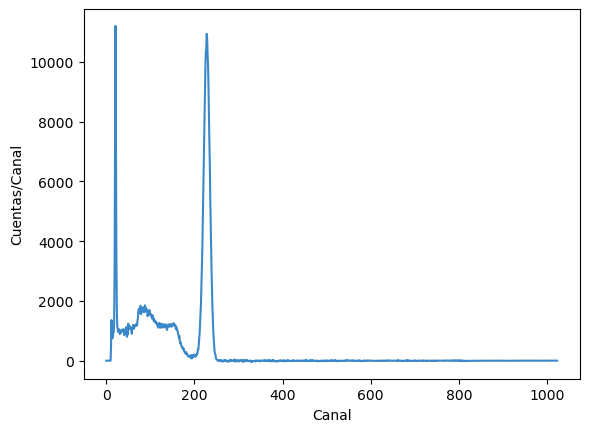

In [42]:
canales137Cs = np.array(Cs137['canal'])
cuentas137Cs = np.array(Cs137['cuentas'])-np.array(fondo['cuentas'])

plt.plot(canales137Cs, cuentas137Cs)
plt.xlabel('Canal')
plt.ylabel('Cuentas/Canal')
plt.savefig('137Cs.png', dpi=300)

In [71]:
canales = np.array(canales137Cs[15: 30])
cuentas = np.array(cuentas137Cs[15: 30])

initial_guess = [max(cuentas), np.mean(canales), np.std(canales), min(cuentas), 0 ]
params137Cs_1, cov137Cs_1 = fit_curve(canales, cuentas, line_gaussian, initial_guess)

canales_ = np.linspace(15, 30)

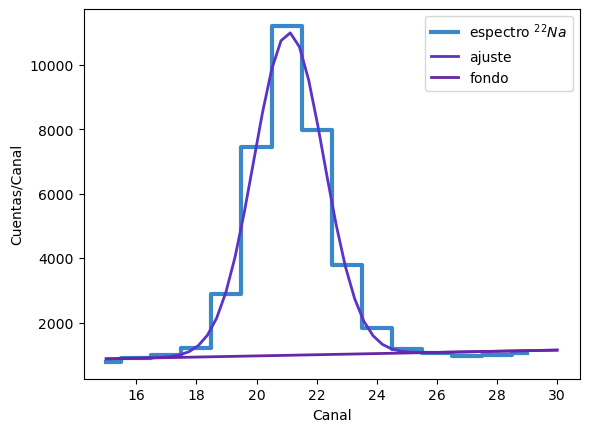

In [72]:
plt.plot(canales, cuentas, label=r'espectro $^{22}Na$', ds ='steps-mid', linewidth=3)
plt.plot(canales_, line_gaussian(canales_, *params137Cs_1), linewidth=2, label = 'ajuste')
plt.plot(canales_, line(canales_-21, *params137Cs_1[-2:]), label='fondo',  linewidth=2)
plt.legend()
plt.xlabel('Canal')
plt.ylabel('Cuentas/Canal')
plt.savefig('137Cspico1.png', dpi=300)

In [75]:
np.sqrt(2*np.pi)*params137Cs_1[0]*params137Cs_1[2], np.sqrt(2*np.pi)*np.sqrt(np.diag(cov137Cs_1))[0]*params137Cs_1[2]

(29249.853554946407, 529.5565921896067)

In [73]:
canales = np.array(canales137Cs[200: 255])
cuentas = np.array(cuentas137Cs[200: 255])

initial_guess = [max(cuentas), np.mean(canales), np.std(canales), min(cuentas), 0 ]
params137Cs_2, cov137Cs_2 = fit_curve(canales, cuentas, line_gaussian, initial_guess)

canales_ = np.linspace(200, 255)

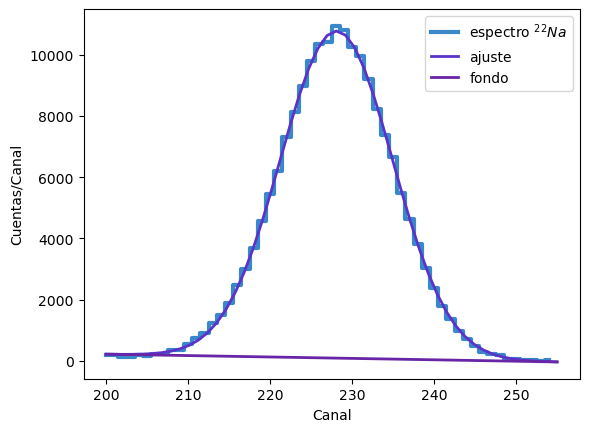

In [74]:
plt.plot(canales, cuentas, label=r'espectro $^{22}Na$', ds ='steps-mid', linewidth=3)
plt.plot(canales_, line_gaussian(canales_, *params137Cs_2), linewidth=2, label = 'ajuste')
plt.plot(canales_, line(canales_-229, *params137Cs_2[-2:]), label='fondo',  linewidth=2)
plt.legend()
plt.xlabel('Canal')
plt.ylabel('Cuentas/Canal')
plt.savefig('137Cspico2.png', dpi=300)

In [76]:
np.sqrt(2*np.pi)*params137Cs_2[0]*params137Cs_2[2], np.sqrt(2*np.pi)*np.sqrt(np.diag(cov137Cs_2))[0]*params137Cs_2[2]

(183457.11273315334, 513.3755160420836)